<a href="https://colab.research.google.com/github/PrithviPy/melanoma_classification/blob/main/Melanoma_Classification_Custome_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Melanoma Detection Assignment

## Problem statement

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.


The data set contains the following diseases:

- Actinic keratosis
- Basal cell carcinoma
- Dermatofibroma
- Melanoma
- Nevus
- Pigmented benign keratosis
- Seborrheic keratosis
- Squamous cell carcinoma
- Vascular lesion

Please download the Ipython notebook from [here](https://github.com/ContentUpgrad/Convolutional-Neural-Networks/blob/main/Melanoma%20Detection%20Assignment/Starter_code_Assignment_CNN_Skin_Cancer%20(1).ipynb).

In [1]:
import platform
import tensorflow as tf

print("Python version: ", platform.python_version())
print("TensorFlow version: ", tf.__version__)

device_name = tf.test.gpu_device_name()
device_name

Python version:  3.10.12
TensorFlow version:  2.12.0


'/device:GPU:0'

Optional Connecting to G Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing neccessary libraries

**pathlib:** Imported for managing file paths and directories.

**tensorflow (tf):** TensorFlow library, used for deep learning tasks.

**matplotlib.pyplot (plt):**Matplotlib's pyplot module, utilized for creating visualizations.

**numpy (np):** Numpy library, employed for numerical operations and array handling.

**pandas (pd):** Pandas library, used for data manipulation and analysis.

**os:** Python's os module, employed for interacting with the operating system.

**PIL:** Python Imaging Library, used for image processing.

**keras:** Keras, an API provided by TensorFlow for building and training
neural networks.

**layers:** Keras' layers module, used for building layers in a neural network.

**Sequential:** Sequential class from Keras' models module, used for creating sequential models.

In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Setting path for dataset

In [4]:
root_path = '/content/drive/My Drive/Colab Notebooks/dataset'
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print('Number of Images in train folder ===> ',image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print('Number of Images in test folder ===> ',image_count_test)

Number of Images in train folder ===>  2239
Number of Images in test folder ===>  118


## Loading Dataset

Setiing global variables

In [5]:
batch_size = 32
img_height = 180
img_width = 180
epochs = 20

In [6]:
# Train

train_dataset = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Validation

validation_dataset = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
class_lables = train_dataset.class_names
print('Class Lables ==> ',class_lables)

Class Lables ==>  ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Dataset visualisation

Lets view few images of different class

Code to visualize one instance of all the nine classes present in the dataset

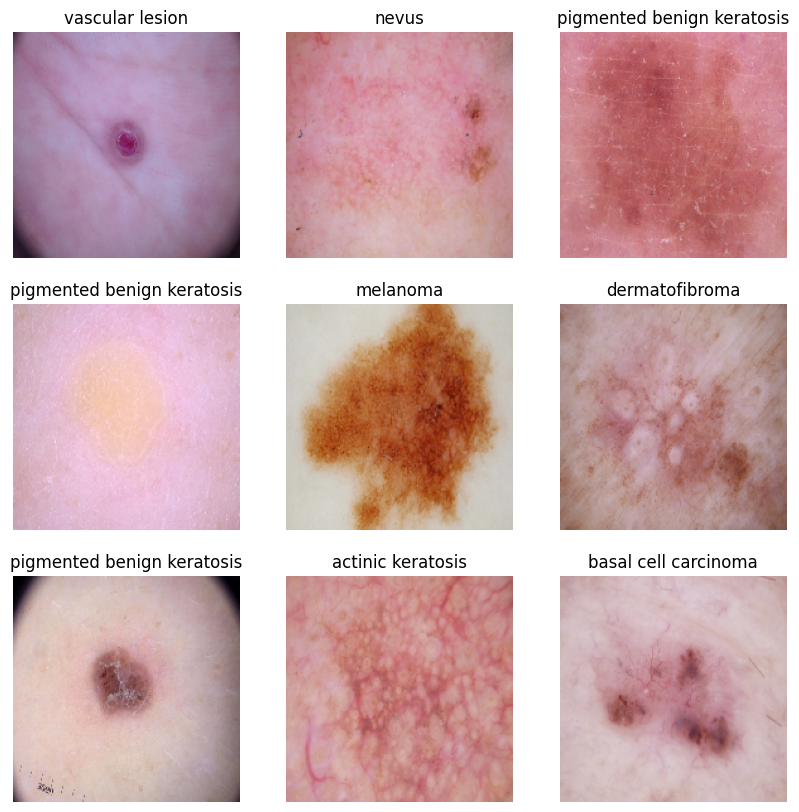

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_lables[labels[i]])
    plt.axis("off")

# Model Building & training


- Created a CNN model, which can accurately detect 9 classes present in the dataset.
- Defined appropriate optimiser and loss function for model training.
- Trained the model for ~20 epochs.
- Explained the findings after the model fit with evidence if the model overfits or underfits.

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

### Model Creation

Here we use sequential model

In [10]:
num_classes = len(class_lables)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Compiling model to make it ready for trainning.

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

# Training model

Looping the model training for 20 epoch

In [13]:
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 334s 3s/step - loss: 2.0380 - accuracy: 0.2472 - val_loss: 1.8130 - val_accuracy: 0.3781
Epoch 2/20
56/56 [==============================] - 1s 24ms/step - loss: 1.6970 - accuracy: 0.3845 - val_loss: 1.5711 - val_accuracy: 0.4273
Epoch 3/20
56/56 [==============================] - 1s 21ms/step - loss: 1.5581 - accuracy: 0.4425 - val_loss: 1.4948 - val_accuracy: 0.5011
Epoch 4/20
56/56 [==============================] - 1s 21ms/step - loss: 1.4754 - accuracy: 0.4760 - val_loss: 1.6158 - val_accuracy: 0.4161
Epoch 5/20
56/56 [==============================] - 1s 21ms/step - loss: 1.3678 - accuracy: 0.5240 - val_loss: 1.4575 - val_accuracy: 0.5078
Epoch 6/20
56/56 [==============================] - 1s 21ms/step - loss: 1.2877 - accuracy: 0.5480 - val_loss: 1.5325 - val_accuracy: 0.4653
Epoch 7/20
56/56 [==============================] - 1s 21ms/step - loss: 1.2519 - accuracy: 0.5547 - val_loss: 1.3899 - val_accuracy: 0.5503
Epoch 8/20
56

## Plotting accuracy and loss graph

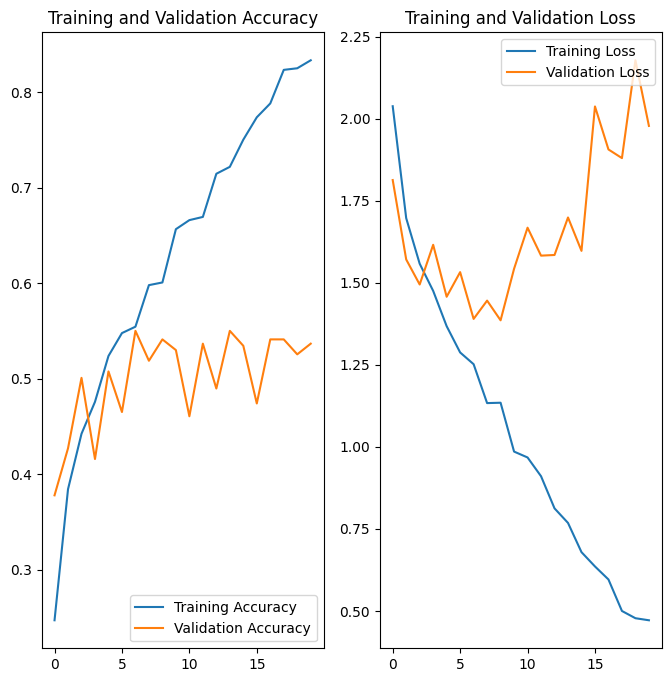

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Augumentation


Data augmentation is a technique commonly used in Convolutional Neural Networks (CNNs) and other machine learning models to artificially increase the size and diversity of a training dataset. It involves applying various transformations and modifications to the original images in order to create new variations of the same data. The primary purpose of data augmentation in CNNs is to improve the model's generalization ability and enhance its performance on real-world data by exposing it to a wider range of variations.

In [15]:
agugumented_dataset = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

Plotting augumented data

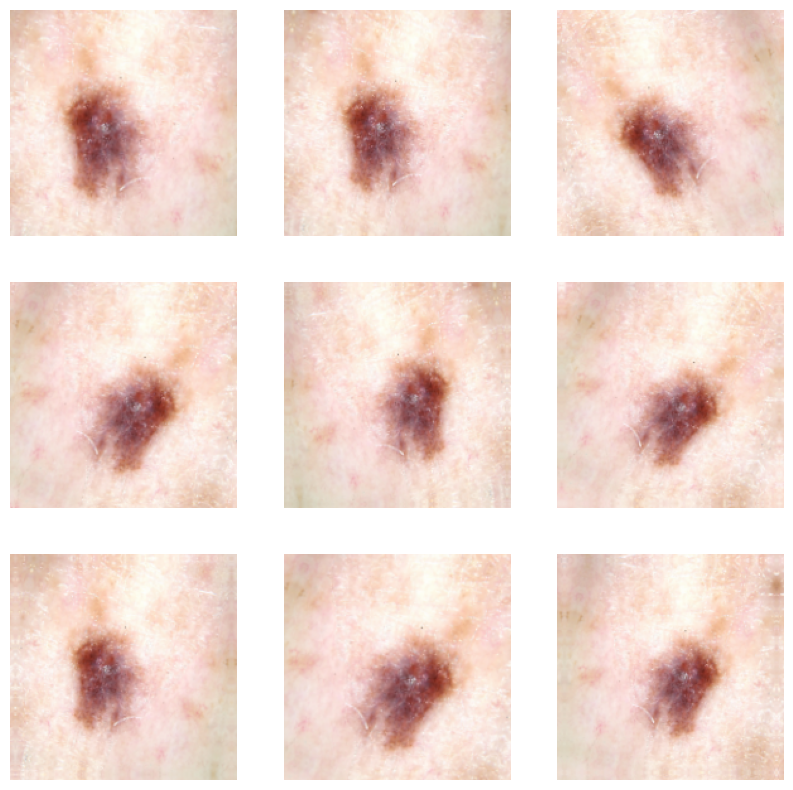

In [16]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = agugumented_dataset(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

Creating model with augmented data

In [17]:
num_classes = len(class_lables)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
epochs = 20
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

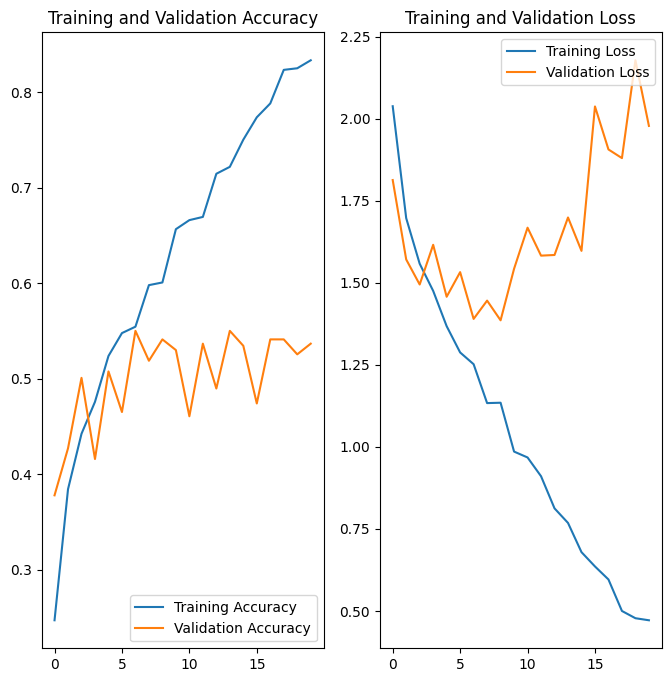

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

What we have found here is the model has some improvements post adding dropout but still there is scope to reduce the overfit by adding augumentation libraries

# Plotting the distribution

<Figure size 1000x1000 with 0 Axes>

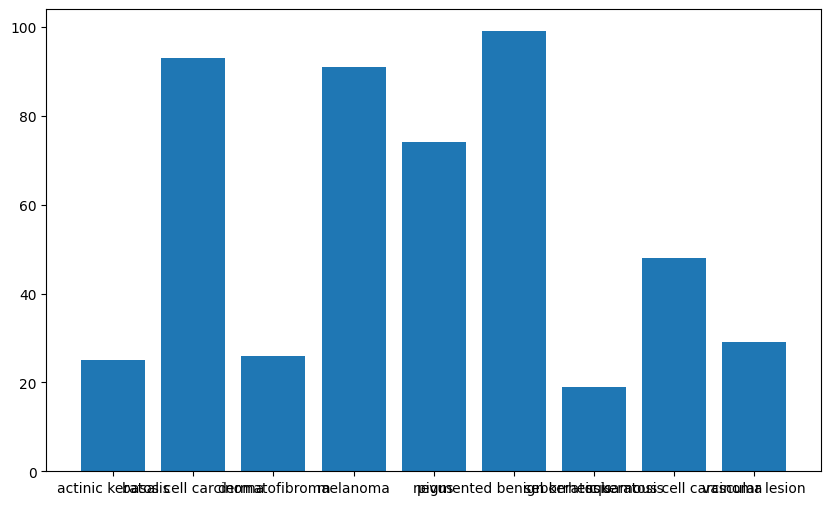

In [25]:
import matplotlib.pyplot as plt
data = dict()

for i in class_lables:
  data[i] = []

plt.figure(figsize=(10, 10))
for images, labels in train_dataset:
  for i in range(9):
    data[class_lables[labels[i]]].append(images[i].numpy().astype("uint8"))

for i in data:
  data[i] = len(data[i])

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

plt.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()))
plt.show()

# Initial Situation:

To rectify the problem of imbalanced classes, you can employ a Python package called Augmentor (https://augmentor.readthedocs.io/en/master/). This approach entails generating additional samples across all classes to ensure that no class is underrepresented.

# Identify the Least Sampled Class:

The class "Seborrheic keratosis" has the fewest number of samples, and it is closely followed by "Actinic Keratosis."

# Identify Dominant Classes:

The class "Pigmented benign keratosis" takes the lead in terms of the number of samples in the training set, surpassing a count of 100.

Here's how you can implement these steps using the Augmentor package:

# Resolve Class Imbalance:

To rectify the issue of imbalanced classes, you can leverage the Augmentor package. Its purpose is to increase the number of samples in all classes uniformly, ensuring that each class has a sufficient representation.

# Identify Classes with Few Samples:

Through examination, it is evident that the class "Seborrheic keratosis" has the lowest number of samples, and "Actinic Keratosis" follows closely behind.

# Spot Dominant Classes:

In terms of the proportionate number of samples, the class "Pigmented benign keratosis" emerges as the dominant one. It possesses a count exceeding 100 instances in the training dataset.

In [21]:
!pip install Augmentor

To use Augmentor, the following general procedure is followed:

Instantiate a Pipeline object pointing to a directory containing your initial image data set.
Define a number of operations to perform on this data set using your Pipeline object.
Execute these operations by calling the Pipeline’s sample() method.

In [23]:
path_to_training_dataset="/content/drive/My Drive/Colab Notebooks/dataset/Train/"
import Augmentor
for i in class_lables:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/dataset/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E5899660700>: 100%|██████████| 500/500 [00:17<00:00, 28.75 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/dataset/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E589963D0F0>: 100%|██████████| 500/500 [00:17<00:00, 28.58 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/dataset/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E589950ED10>: 100%|██████████| 500/500 [00:18<00:00, 26.53 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/dataset/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7E58995A23E0>: 100%|██████████| 500/500 [01:38<00:00,  5.08 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/dataset/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1019x717 at 0x7E58992E8280>: 100%|██████████| 500/500 [01:17<00:00,  6.46 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/dataset/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E592FD61300>: 100%|██████████| 500/500 [00:17<00:00, 28.74 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/dataset/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7E592FD611E0>: 100%|██████████| 500/500 [00:39<00:00, 12.59 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/dataset/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E589950EEC0>: 100%|██████████| 500/500 [00:17<00:00, 28.89 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/dataset/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E589968C2E0>: 100%|██████████| 500/500 [00:17<00:00, 28.51 Samples/s]


Augmentor has organized the augmented images within separate subdirectories, nested within each of the original subdirectories corresponding to different types of skin cancer. Now, let's proceed to determine the total count of these augmented images.

In [26]:
# Count the images post generating the output directory
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [27]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]


In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [31]:
# Create dataframe dict out of the above variables
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [32]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [33]:
# Printing the label counts to check parity
new_df['Label'].value_counts()

seborrheic keratosis          500
pigmented benign keratosis    500
nevus                         500
melanoma                      500
basal cell carcinoma          500
actinic keratosis             500
vascular lesion               500
dermatofibroma                500
squamous cell carcinoma       500
Name: Label, dtype: int64

Train the model on the data created using Augmentor

In [34]:
batch_size = 32
img_height = 180
img_width = 180

Create a training dataset

In [35]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


Create a validation dataset

In [36]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Create your model (make sure to include normalization)

In [39]:
from tensorflow.keras.layers import Dense, BatchNormalization
num_classes = len(class_lables)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  BatchNormalization(),
  layers.Dense(num_classes)
])

In [40]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 45s 246ms/step - loss: 1.7680 - accuracy: 0.3476 - val_loss: 2.6601 - val_accuracy: 0.1826
Epoch 2/50
169/169 [==============================] - 49s 280ms/step - loss: 1.4440 - accuracy: 0.4672 - val_loss: 3.6084 - val_accuracy: 0.1477
Epoch 3/50
169/169 [==============================] - 42s 244ms/step - loss: 1.3100 - accuracy: 0.5204 - val_loss: 3.0603 - val_accuracy: 0.1574
Epoch 4/50
169/169 [==============================] - 41s 235ms/step - loss: 1.2141 - accuracy: 0.5640 - val_loss: 2.8993 - val_accuracy: 0.1915
Epoch 5/50
169/169 [==============================] - 47s 269ms/step - loss: 1.1090 - accuracy: 0.6000 - val_loss: 2.3582 - val_accuracy: 0.2405
Epoch 6/50
169/169 [==============================] - 40s 232ms/step - loss: 1.0431 - accuracy: 0.6265 - val_loss: 2.1682 - val_accuracy: 0.2918
Epoch 7/50
121/169 [====================>.........] - ETA: 8s - loss: 0.9905 - accuracy: 0.6444

Visualise the results

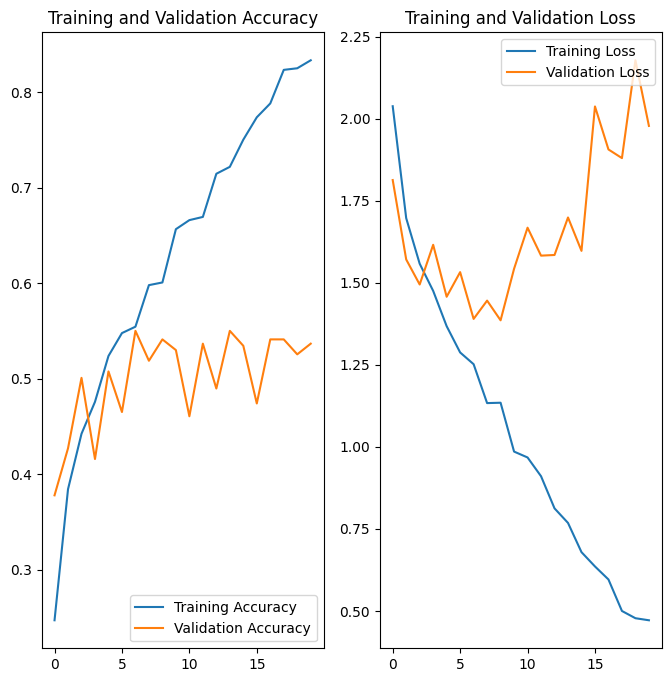

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Effect on Overfitting/Underfitting:

- With 50 epochs, you observed that validation accuracy improved, and the gap between training and validation accuracy reduced. This indicates that the rebalanced dataset helped mitigate overfitting and underfitting issues.

- In conclusion, rebalancing the dataset through augmentation improved the validation accuracy, and various epoch and dropout combinations were experimented with to achieve better results.